▶**TASK-3 : VIDEO GAME SALES PREDICTION**

> Author: Sanskar Dewangan

> Batch: August 2023

> Domain: Data Science


> Aim: To build a model that predicts video game sales.



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [4]:
data=pd.read_csv("Video_Games_Sales.csv")
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [6]:
data.head

<bound method NDFrame.head of                                 Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

         

In [7]:
data.info

<bound method DataFrame.info of                                 Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

       

In [8]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [9]:
data=data.dropna()

In [10]:
data.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [11]:
games=data.groupby("Genre")["Global_Sales"].count().head(10)

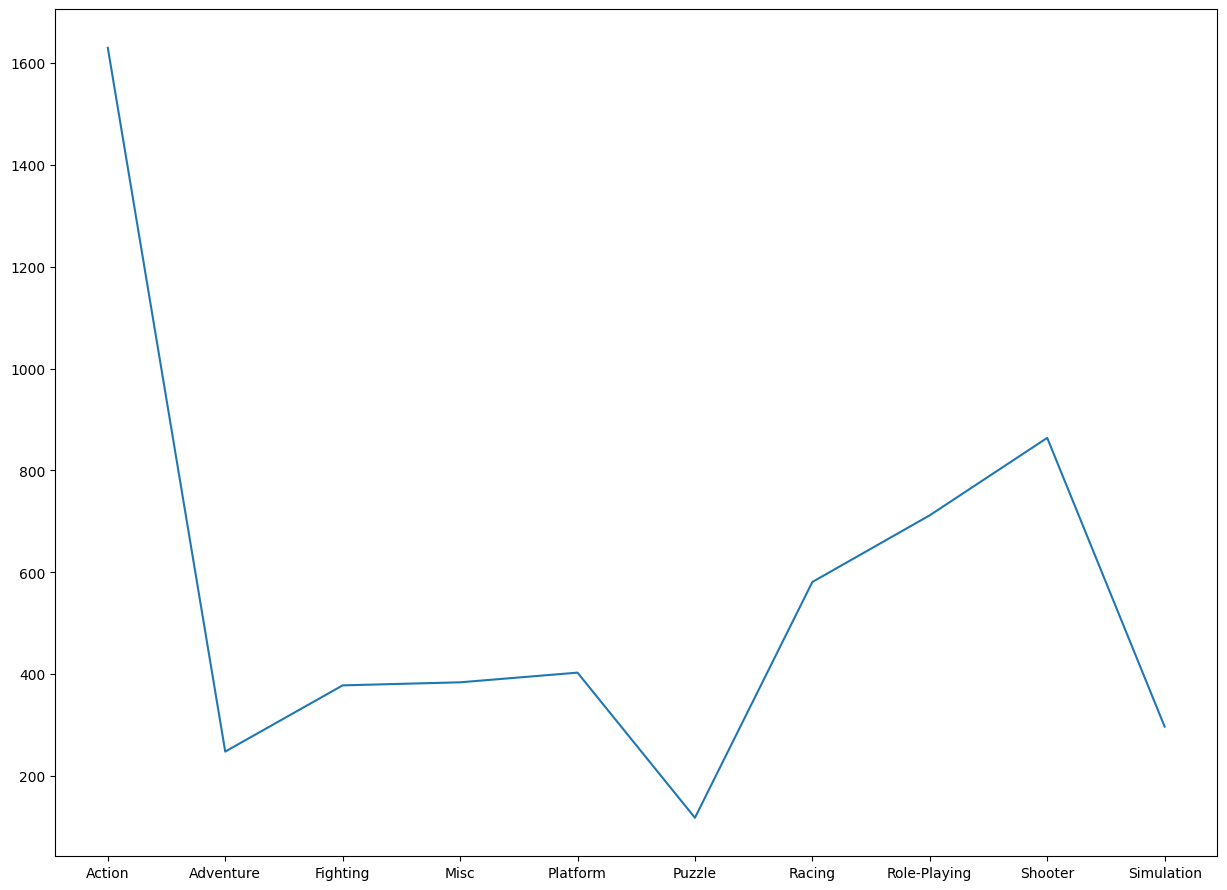

In [12]:
plt.figure(figsize=(15,11))
plt.plot(games)
plt.show()

In [25]:
numeric_columns = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

print(correlation_matrix)

                 Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year_of_Release         1.000000 -0.016239  0.041346 -0.038443     0.042315   
NA_Sales               -0.016239  1.000000  0.841808  0.468607     0.726757   
EU_Sales                0.041346  0.841808  1.000000  0.519929     0.716330   
JP_Sales               -0.038443  0.468607  0.519929  1.000000     0.394823   
Other_Sales             0.042315  0.726757  0.716330  0.394823     1.000000   
Global_Sales            0.006661  0.955793  0.939313  0.613546     0.804028   
Critic_Score           -0.007661  0.233580  0.213102  0.147314     0.191509   
Critic_Count            0.203336  0.283917  0.265740  0.168299     0.239513   
User_Count              0.199348  0.246208  0.283504  0.072773     0.240085   

                 Global_Sales  Critic_Score  Critic_Count  User_Count  
Year_of_Release      0.006661     -0.007661      0.203336    0.199348  
NA_Sales             0.955793      0.233580      0.283917    0.24

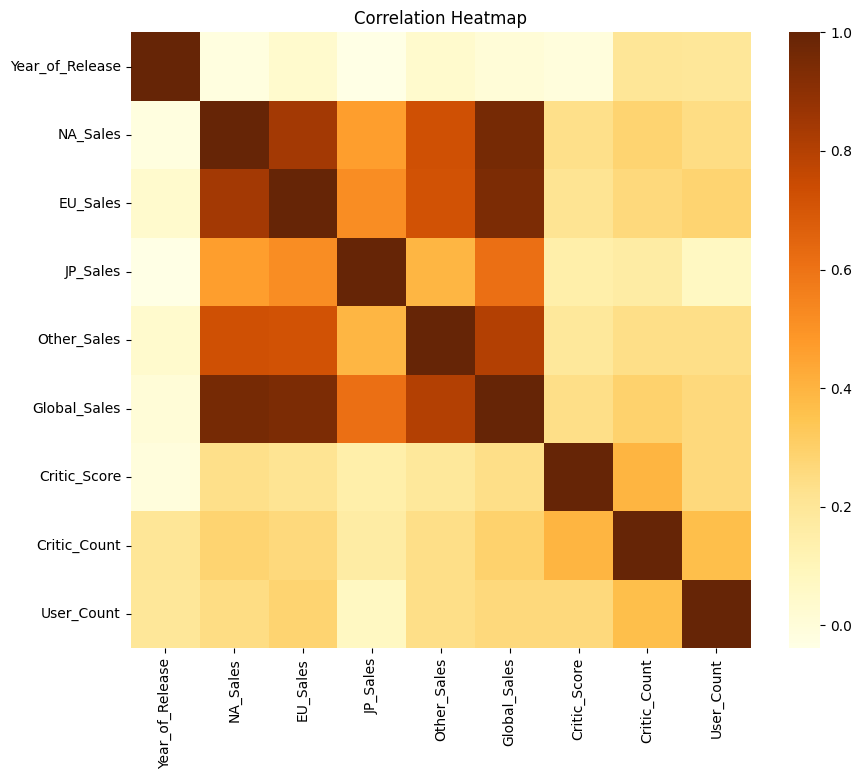

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="YlOrBr")
plt.title("Correlation Heatmap")
plt.show()

In [38]:
x=data.iloc[:,data.columns!="Global_Sales"]
x

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,41.36,28.96,3.77,8.45
2,15.68,12.76,3.79,3.29
3,15.61,10.93,3.28,2.95
6,11.28,9.14,6.50,2.88
7,13.96,9.18,2.93,2.84
...,...,...,...,...
16667,0.01,0.00,0.00,0.00
16677,0.01,0.00,0.00,0.00
16696,0.00,0.01,0.00,0.00
16700,0.01,0.00,0.00,0.00


In [41]:
y=data["Global_Sales"]
y

0        82.53
2        35.52
3        32.77
6        29.80
7        28.92
         ...  
16667     0.01
16677     0.01
16696     0.01
16700     0.01
16706     0.01
Name: Global_Sales, Length: 6825, dtype: float64

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [43]:
x_train

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3617,0.25,0.05,0.22,0.03
1695,0.99,0.04,0.00,0.16
1346,0.73,0.42,0.00,0.27
4972,0.33,0.02,0.00,0.03
1412,0.80,0.45,0.00,0.12
...,...,...,...,...
6822,0.22,0.00,0.00,0.02
10306,0.10,0.00,0.00,0.01
10416,0.05,0.00,0.04,0.02
10884,0.08,0.01,0.00,0.01


In [44]:
x_test

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
146,3.18,1.83,0.78,0.24
4427,0.17,0.13,0.06,0.08
6970,0.17,0.05,0.00,0.01
3885,0.36,0.11,0.00,0.04
11023,0.05,0.03,0.00,0.02
...,...,...,...,...
967,0.78,0.44,0.56,0.04
2278,0.02,0.80,0.02,0.07
7851,0.10,0.07,0.00,0.02
6341,0.13,0.10,0.00,0.03


In [45]:
y_train

3617     0.55
1695     1.19
1346     1.42
4972     0.38
1412     1.37
         ... 
6822     0.24
10306    0.11
10416    0.10
10884    0.09
1345     1.43
Name: Global_Sales, Length: 4777, dtype: float64

In [46]:
y_test

146      6.03
4427     0.44
6970     0.23
3885     0.51
11023    0.09
         ... 
967      1.81
2278     0.91
7851     0.19
6341     0.27
8058     0.18
Name: Global_Sales, Length: 2048, dtype: float64

In [47]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([6.02977619, 0.4402046 , 0.23024599, ..., 0.19023682, 0.26022754,
       0.18021995])

In [51]:
model2=DecisionTreeRegressor()
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
y_pred

array([6.44      , 0.39      , 0.22666667, ..., 0.19333333, 0.26526316,
       0.14      ])